In [1]:
!pwd

/aiffel/aiffel/workplace


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data = pd.read_csv('/aiffel/data/trip.csv')

In [17]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [111]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [76]:
#결측치 찾고 지우기
data.isna().mean()

nonul = data.dropna()
nonul.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

0        6
15629    6
18065    6
6489     6
20298    6
Name: passenger_count, dtype: int64

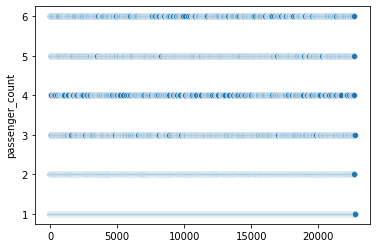

In [100]:
#승객수 이상치 찾기
sns.scatterplot(x=nonul.index, y=nonul['passenger_count'])

#승객수 이상치 발견하고 지우기
over7 = nonul[(nonul['passenger_count'] > 7) | (nonul['passenger_count'] < 0)]
nonul = nonul.drop(over7.index)

nonul['passenger_count'].sort_values(ascending = False).head()

<AxesSubplot:ylabel='trip_distance'>

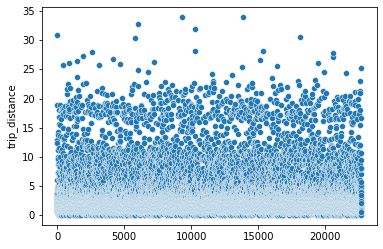

In [74]:
#주행거리 이상치 찾기
sns.scatterplot(x=nonul.index, y=nonul['trip_distance'])

<AxesSubplot:ylabel='fare_amount'>

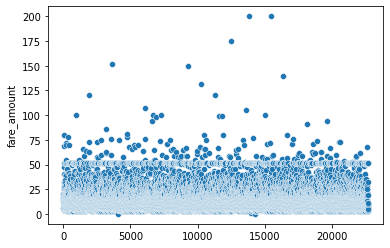

In [104]:
#요금 이상치 찾기
sns.scatterplot(x=nonul.index, y=nonul['fare_amount'])

In [105]:
#요금 이상치 지우기
wrongfare = nonul[(nonul['fare_amount'] > 300) | (nonul['fare_amount'] <= 0)]
wrongfare

nonul = nonul.drop(wrongfare.index)
nonul['fare_amount'].sort_values(ascending = False).tail()

5620     2.50
321      2.50
13972    1.00
4063     0.01
14285    0.01
Name: fare_amount, dtype: float64

<AxesSubplot:ylabel='tip_amount'>

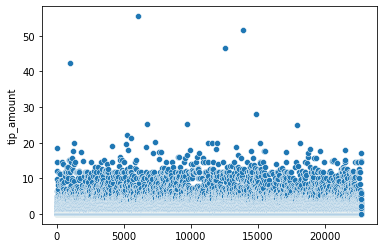

In [112]:
#팁 이상치 찾기
sns.scatterplot(x=nonul.index, y=nonul['tip_amount'])

<AxesSubplot:ylabel='tolls_amount'>

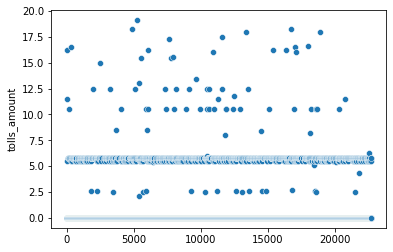

In [110]:
#톨비 이상치 찾기
sns.scatterplot(x=nonul.index, y=nonul['tolls_amount'])

In [126]:
#이상치 지우기 완성하고 저장하기
nonul.to_csv('data2')
data2 = nonul
data2.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22642.000000,22642.000000,22642.000000,22642.000000,22642.000000
mean,1.644510,2.914332,12.977819,1.827920,0.312013
std,1.284317,3.651818,11.092014,2.473247,1.397140
min,1.000000,0.000000,0.010000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.070000,14.500000,2.450000,0.000000
max,6.000000,33.960000,200.010000,55.500000,19.100000


In [141]:
#카드 이름 통일하기
data2['payment_method'].value_counts()


data2['payment_method'] = data2['payment_method'].str[-4:]

In [138]:
#탑승시간 조회

#datetime형식으로 변환
from datetime import datetime
data2['tpep_pickup_datetime'] = pd.to_datetime(data2['tpep_pickup_datetime'])
data2['tpep_dropoff_datetime'] = pd.to_datetime(data2['tpep_dropoff_datetime'])

#픽업과 드랍 시간 만들기
data2['pickup'] = data2['tpep_pickup_datetime'].dt.strftime('%H:%M')
data2['dropoff'] = data2['tpep_dropoff_datetime'].dt.strftime('%H:%M')

# 탑승 시간 계산
data2['ontime'] = data2['tpep_dropoff_datetime'] - data2['tpep_pickup_datetime']

<AxesSubplot:ylabel='ontime'>

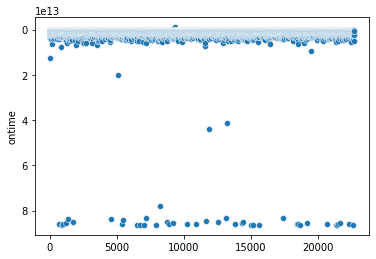

In [154]:
#탑승시간 이상치 찾기
data2['ontime'].sort_values(ascending=False).tail()
sns.scatterplot(x=nonul.index, y=nonul['ontime'])

In [157]:
# 탑승시간 이상치 지우기
data2['ontime'].sort_values(ascending=False).tail(15)

15297     0 days 00:00:00
21622     0 days 00:00:00
17272     0 days 00:00:00
9157      0 days 00:00:00
7329      0 days 00:00:00
16588     0 days 00:00:00
2442      0 days 00:00:00
17313     0 days 00:00:00
8891      0 days 00:00:00
474       0 days 00:00:00
14064     0 days 00:00:00
19840     0 days 00:00:00
17569     0 days 00:00:00
2742      0 days 00:00:00
9358    -1 days +23:43:01
Name: ontime, dtype: timedelta64[ns]

In [1]:
# 1분 이상 탑승하지 않은 경우 없애기
threshold = pd.Timedelta(minutes = 1)
data2 = data2[data2['ontime'] <= threshold]

NameError: name 'pd' is not defined